<a href="https://colab.research.google.com/github/sasomoto/Using-LDA-Linear-Regression-tf-and-scikit-learn-and-RF-to-predict-university-admission-chances/blob/main/2022A7PS1377H%2C2022AAPS0508H%2C2022A7PS1367HML_Assignment_3(Dhairya_Luthra%2CShashwat_sharma%2CAnimesh_Agrahari).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MACHINE LEARNING ASSIGNMENT 3

## TEAM MEMBERS
1. Dhairya Luthra(2022A7PS1377H)
2. Shashwat Sharma(2022AAPS0508H)
3. Animesh Agrahari(2022A7PS1367H)


---

## Assignment Tasks
## 1. Data Loading and Preparation
- [ ] Import necessary libraries (`os`, `pandas`, `numpy`, `tensorflow`).
- [ ] Load dataset into a Pandas DataFrame (`pd.read_csv()`).
- [ ] Handle missing values and outliers

## 2. Data Scaling
- [ ] Analyze the distribution of features (`df.describe()`, `seaborn`/`matplotlib` for plots).
- [ ] Select an appropriate scaling method (`StandardScaler`, `MinMaxScaler`, `RobustScaler`).
- [ ] Apply the scaler to the features.

## 3. Dimensionality Reduction with LDA
- [ ] Convert "Chance of Admit" to categorical (low, medium, high) using `pd.cut()`.
- [ ] Apply Linear Discriminant Analysis (LDA) on the dataset using `sklearn.discriminant_analysis.LinearDiscriminantAnalysis`.
- [ ] Retain appropriate number of LDA components and justify the selection.

## 4. Linear Regression on LDA Transformed Data

### Using TensorFlow:
- [ ] Convert LDA-transformed data into TensorFlow tensors (`tf.convert_to_tensor()`).
- [ ] Define a linear regression model using TensorFlow (initialize weights and biases).
- [ ] Train the model using Mean Squared Error and Stochastic Gradient Descent (learning rate = 0.01, 1000 epochs).
- [ ] Visualize actual vs. predicted labels using `matplotlib`.

### Using Scikit-Learn:
- [ ] Implement linear regression using `LinearRegression` from `scikit-learn`.
- [ ] Train the model and visualize performance.
- [ ] Compare results with the TensorFlow model.

## 5. Logistic Regression for Categorized Admission Chances
- [ ] Convert "Chance of Admit" into low, medium, high categories.
- [ ] Implement Logistic Regression using TensorFlow (`Softmax` activation for multi-class classification).
- [ ] Train the model, tune the learning rate (try values like 0.001, 0.01).
- [ ] Compare Logistic Regression performance with Random Forest from the previous assignment.

## 6. Hyperparameter Tuning
- [ ] Explore different learning rates (e.g., 0.001, 0.01, 0.1).
- [ ] Use Grid Search or Random Search for hyperparameter tuning (e.g., regularization).

## 7. Model Evaluation
- [ ] Apply k-fold cross-validation (using `cross_val_score` from `sklearn.model_selection`).
- [ ] Report metrics: Accuracy, Precision, Recall, F1-Score, and AUC-ROC.



 # Data Loading and Preparation

In [ ]:
# Data Handling and Analysis
import os
import pandas as pd
import numpy as np

# Data Preprocessing and Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, mean_squared_error

# Dimensionality Reduction (LDA)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Linear and Logistic Regression Models
from sklearn.linear_model import LinearRegression, LogisticRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Softmax
from tensorflow.keras.optimizers import SGD

# Cross-Validation
from sklearn.model_selection import cross_val_score

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import pandas as pd

# Replace the path with the actual path to your file
csv_file_path = '/content/sample_data/Admission_Predict_A3.csv'

# Load the CSV file
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
missing_values = df.isnull().sum()
print("The missing values are:\n",missing_values)
missing_columns = df.columns[df.isnull().any()]
print("\nColumns with missing values:\n", missing_columns)


The missing values are:
 Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Columns with missing values:
 Index([], dtype='object')


## Since there are no missing values we dont need impute

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each feature
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Calculate Interquartile Range (IQR)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = (df < lower_bound) | (df > upper_bound)

print(outliers)



     Serial No.  GRE Score  TOEFL Score  University Rating    SOP   LOR   \
0         False      False        False              False  False  False   
1         False      False        False              False  False  False   
2         False      False        False              False  False  False   
3         False      False        False              False  False  False   
4         False      False        False              False  False  False   
..          ...        ...          ...                ...    ...    ...   
495       False      False        False              False  False  False   
496       False      False        False              False  False  False   
497       False      False        False              False  False  False   
498       False      False        False              False  False  False   
499       False      False        False              False  False  False   

      CGPA  Research  Chance of Admit   
0    False     False             False  
1    

## Since the no of outliers are too low we drop them

In [ ]:
# Remove rows with outliers in specific columns
df_cleaned = df[~((df['LOR '] > upper_bound['LOR ']) | (df['LOR '] < lower_bound['LOR ']) |
                  (df['Chance of Admit '] > upper_bound['Chance of Admit ']) | (df['Chance of Admit '] < lower_bound['Chance of Admit ']))]

print(df_cleaned.shape)  # Check the shape of the cleaned data
df_cleaned.head()


(497, 9)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Data Scaling

       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  497.000000  497.000000   497.000000         497.000000  497.000000   
mean   250.366197  316.583501   107.259557           3.122736    3.379276   
std    144.567635   11.237070     6.036101           1.140806    0.987070   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    126.000000  308.000000   103.000000           2.000000    2.500000   
50%    250.000000  317.000000   107.000000           3.000000    3.500000   
75%    375.000000  325.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

             LOR         CGPA    Research  Chance of Admit   
count  497.000000  497.000000  497.000000        497.000000  
mean     3.492958    8.582334    0.563380          0.723883  
std      0.918806    0.601367    0.496466          0.138800  
min      1.500000    6.800000    0.000000          0.36000

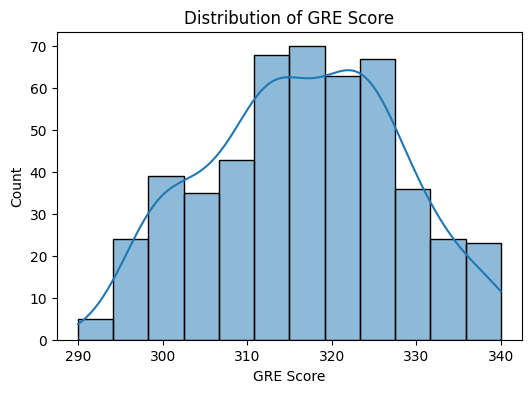

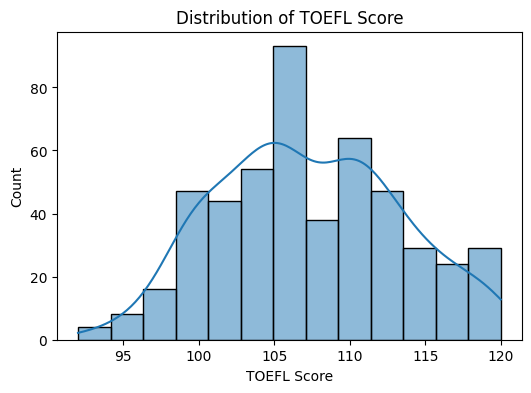

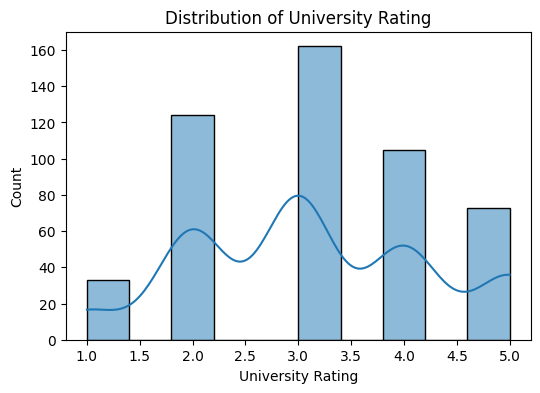

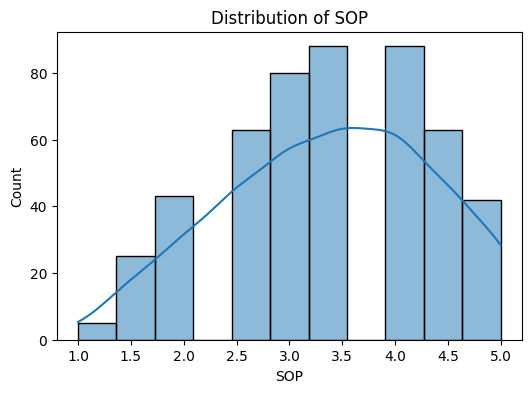

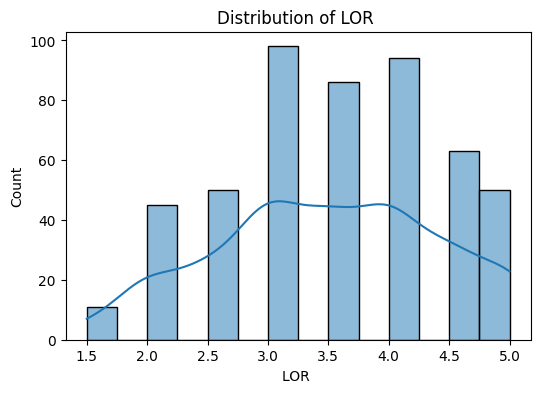

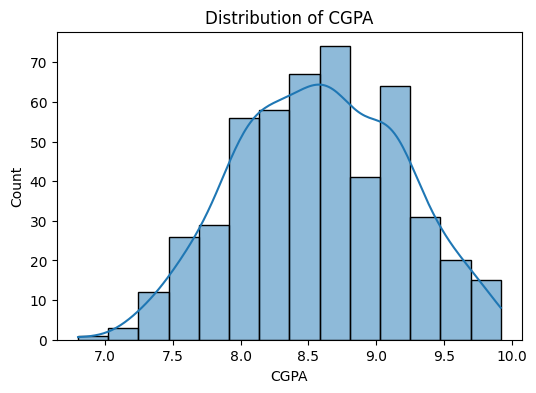

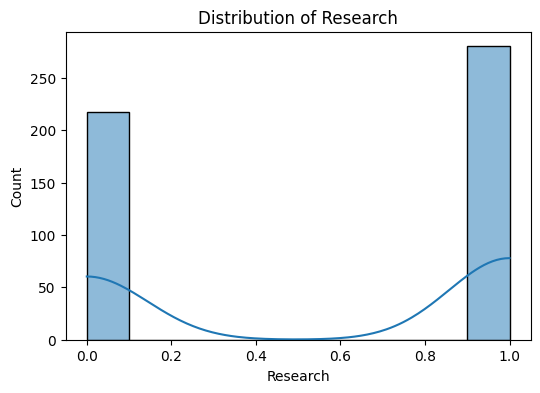

In [ ]:
df = df_cleaned.copy()

# Summary statistics for each feature
print(df.describe())

# Visualizing the distribution of features
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through numerical columns and create histograms
for column in df.columns[1:-1]:  # Excluding Serial No. and target variable
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


Given that the data now appears to follow a more normal distribution after analyzing the histograms, StandardScaler would be the most appropriate scaling technique. This is because StandardScaler is designed to scale features by removing the mean and scaling to unit variance, which works best when the data follows a normal or Gaussian distribution.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to the features (excluding Serial No. and the target variable)
scaled_features = scaler.fit_transform(df.drop(['Serial No.', 'Chance of Admit '], axis=1))

# Convert back to a DataFrame for convenience
scaled_df = pd.DataFrame(scaled_features, columns=df.columns[1:-1])

# Add back the target variable (unscaled for now)
scaled_df['Chance of Admit '] = df['Chance of Admit '].values

# Display the first few rows of the scaled DataFrame
scaled_df.head()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.818719,1.781161,0.769761,1.136549,1.097138,1.777188,0.880341,0.92
1,0.660668,-0.043044,0.769761,0.629489,1.097138,0.478836,0.880341,0.76
2,-0.051979,-0.540555,-0.107696,-0.384631,0.007672,-0.969326,0.880341,0.72
3,0.482506,0.454466,-0.107696,0.122429,-1.081793,0.145925,0.880341,0.80
4,-0.230140,-0.706391,-0.985153,-1.398751,-0.537061,-0.619770,-1.135924,0.65


In [ ]:
df = scaled_df.copy()



#Impact of Scaling on Model Performance:
## Why StandardScaler?
StandardScaler transforms the data to have a mean of 0 and standard deviation of 1, which is ideal for many machine learning algorithms that assume normally distributed features. This prevents any single feature from dominating the model just because it has a larger scale.
For linear models like linear regression and logistic regression, which are sensitive to feature scaling, this standardization helps the optimization algorithms (e.g., gradient descent) converge faster and improves overall model accuracy.


Effect of Scaling:
Without scaling, algorithms might focus more on features with larger magnitudes, potentially leading to poor model performance.
Standardized features help improve convergence rates and ensure that all features are treated equally, leading to better model performance and more reliable prediction

#Equal-Frequency Binning (Quantile Binning):
This method divides the data into bins with an equal number of observations

In [ ]:
# Discretize the "Chance of Admit" into three categories using equal-frequency binning
df['Admit_Category'] = pd.qcut(df['Chance of Admit '], q=3, labels=['low', 'medium', 'high'])

# Check the distribution of categories
print(df['Admit_Category'].value_counts())


Admit_Category
low       175
medium    167
high      155
Name: count, dtype: int64


#Applying Linear Discriminant Analysis (LDA)

Shape of LDA-transformed data: (497, 2)


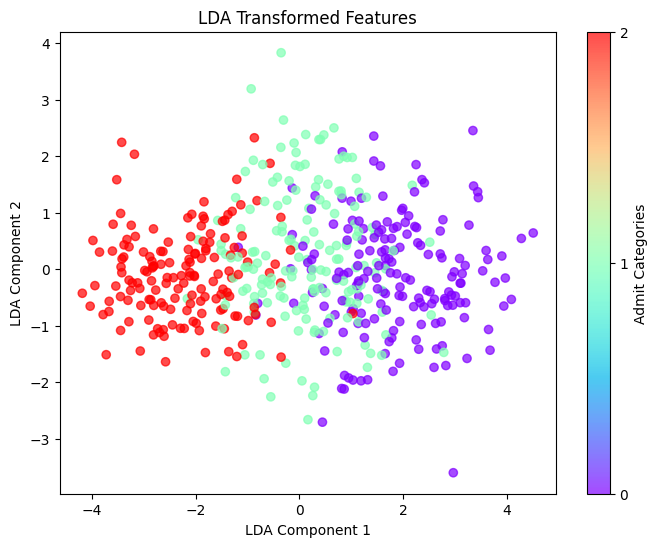

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Define input features (excluding 'Serial No.' and the original 'Chance of Admit')
X = df.drop(['Chance of Admit ', 'Admit_Category'], axis=1)

# Define target (the categorized "Chance of Admit")
y = df['Admit_Category']

# Initialize and apply LDA
lda = LDA(n_components=2)  # Number of components to retain can be adjusted
X_lda = lda.fit_transform(X, y)

# Check the shape of LDA-transformed data
print("Shape of LDA-transformed data:", X_lda.shape)

# Visualize the transformed data if needed
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y.cat.codes, cmap='rainbow', alpha=0.7)
plt.title('LDA Transformed Features')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.colorbar(ticks=[0, 1, 2], label='Admit Categories')
plt.show()


# Justifying the Number of Components Retained
Number of Components: In LDA, the number of components that can be retained is at most min(n_classes - 1, n_features).

Since we have 3 categories (low, medium, high),

 we can retain at most 2 components. Thus, we use n_components=2.


## Why 2 Components?:
Since we have 3 classes (3 possible categories for "Chance of Admit"), LDA can reduce the dataset to 2 components while maintaining maximum class separability. Retaining 2 components allows us to visualize the data in 2D space and keep most of the separability between the classes.

# Evaluation of Dimensionality Reduction
Effect on Dataset: LDA projects the original features into a lower-dimensional space (in this case, 2 dimensions) that maximizes the separation between the "low", "medium", and "high" categories. This helps in reducing the feature space and improving model training efficiency.

Advantages: By using LDA, you can simplify the model without losing much information, as the new components capture the directions in which the class variance is maximized. This often leads to faster and potentially more accurate models, especially for classification tasks.

#Linear Regression Using LDA-Transformed Data
After applying LDA for dimensionality reduction, the transformed data will be used to predict the original continuous "Chance of Admit" values through linear regression. We will implement the regression model using two different approaches: TensorFlow and Scikit-Learn.

#TensorFlow Approach

## Convert LDA-Transformed Data to TensorFlow Tensors

In [ ]:
import tensorflow as tf

# Convert LDA-transformed data and target values to TensorFlow tensors
X_lda_tf = tf.convert_to_tensor(X_lda, dtype=tf.float32)
y_tf = tf.convert_to_tensor(df['Chance of Admit '].values.reshape(-1, 1), dtype=tf.float32)


##  Initialize Weights and Biases

In [ ]:
# Initialize weights and bias (for 2 LDA components)
weights = tf.Variable(tf.random.normal([2, 1]))
bias = tf.Variable(tf.zeros([1]))


##Define Linear Regression Model and Loss Function (MSE)

In [ ]:
# Define the linear regression model
def linear_regression(X):
    return tf.matmul(X, weights) + bias

# Define the loss function (Mean Squared Error)
def mse_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))


 ## Train the Model Using Stochastic Gradient Descent (SGD)

In [ ]:
# Set learning rate and optimizer (SGD)
learning_rate = 0.01
optimizer = tf.optimizers.SGD(learning_rate)

# Train the model for 1000 epochs
epochs = 1000
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_pred = linear_regression(X_lda_tf)
        loss = mse_loss(y_tf, y_pred)

    gradients = tape.gradient(loss, [weights, bias])
    optimizer.apply_gradients(zip(gradients, [weights, bias]))

    # Print the loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss.numpy()}")


Epoch 0: Loss = 9.177894592285156
Epoch 100: Loss = 0.03336561843752861
Epoch 200: Loss = 0.003987435717135668
Epoch 300: Loss = 0.0034984706435352564
Epoch 400: Loss = 0.0034903211053460836
Epoch 500: Loss = 0.0034901846665889025
Epoch 600: Loss = 0.0034901825711131096
Epoch 700: Loss = 0.0034901825711131096
Epoch 800: Loss = 0.0034901825711131096
Epoch 900: Loss = 0.0034901825711131096


## Visualize Actual vs. Predicted Labels

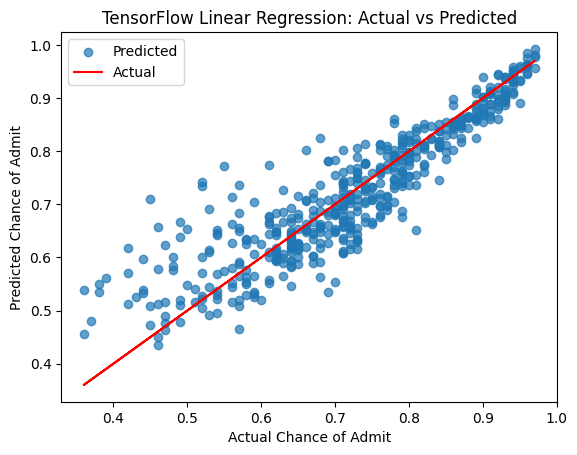

In [ ]:
import matplotlib.pyplot as plt

# Make predictions using the trained model
y_pred_tf = linear_regression(X_lda_tf)

# Plot actual vs predicted labels
plt.scatter(df['Chance of Admit '], y_pred_tf, alpha=0.7, label="Predicted")
plt.plot(df['Chance of Admit '], df['Chance of Admit '], color='red', label="Actual")
plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit')
plt.legend()
plt.title('TensorFlow Linear Regression: Actual vs Predicted')
plt.show()


In [ ]:
# Calculate R² for TensorFlow model
y_mean = tf.reduce_mean(y_tf)
ss_tot = tf.reduce_sum(tf.square(y_tf - y_mean))  # Total sum of squares
ss_res = tf.reduce_sum(tf.square(y_tf - y_pred_tf))  # Residual sum of squares

r2_tf = 1 - (ss_res / ss_tot)
print(f"TensorFlow Linear Regression R²: {r2_tf.numpy()}")


TensorFlow Linear Regression R²: 0.81847083568573


# Scikit-Learn Approach

## Linear Regression Using Scikit-Learn

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the linear regression model
lr_model = LinearRegression()

# Train the model on LDA-transformed data
lr_model.fit(X_lda, df['Chance of Admit '])

# Make predictions
y_pred_sk = lr_model.predict(X_lda)

# Calculate Mean Squared Error
mse_sk = mean_squared_error(df['Chance of Admit '], y_pred_sk)
print(f"Scikit-Learn Linear Regression MSE: {mse_sk}")


Scikit-Learn Linear Regression MSE: 0.0034901824318723505


 ## Visualize Actual vs. Predicted Labels

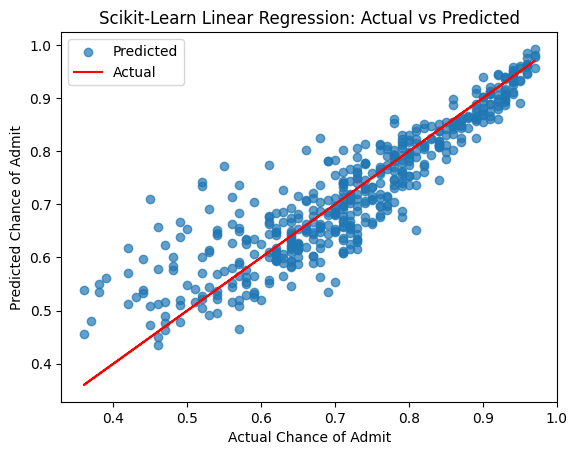

In [ ]:
# Plot actual vs predicted labels
plt.scatter(df['Chance of Admit '], y_pred_sk, alpha=0.7, label="Predicted")
plt.plot(df['Chance of Admit '], df['Chance of Admit '], color='red', label="Actual")
plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit')
plt.legend()
plt.title('Scikit-Learn Linear Regression: Actual vs Predicted')
plt.show()


In [ ]:
from sklearn.metrics import r2_score

# Calculate R² for Scikit-Learn model
r2_sk = r2_score(df['Chance of Admit '], y_pred_sk)
print(f"Scikit-Learn Linear Regression R²: {r2_sk}")


Scikit-Learn Linear Regression R²: 0.8184708737294146


#  Logistic Regression for Categorized "Chance of Admit"

##  Convert "Chance of Admit" into Three Categories

In [ ]:
# Define bin edges and labels
bins = [ 0.3, 0.5, 0.7,1]
labels = ['Low', 'Medium', 'High']

# Create a new column 'AdmitCategory' with the binned data
df['AdmitCategory'] = pd.cut(df['Chance of Admit '], bins=bins, labels=labels, include_lowest=True)

# Check the distribution of the new categories
print(df['AdmitCategory'].value_counts())


AdmitCategory
High      287
Medium    174
Low        36
Name: count, dtype: int64


##Implement Logistic Regression Using TensorFlow

In [ ]:
# Prepare input features (X) and target labels (y) for TensorFlow
X = df.drop(['Chance of Admit ', 'AdmitCategory'], axis=1)
y = df['AdmitCategory']
# Convert to TensorFlow tensors
X_tf = tf.convert_to_tensor(X, dtype=tf.float32)
y_tf = tf.convert_to_tensor(y, dtype=tf.float32)

## Define the Logistic Regression Model with Softmax Activation

In [ ]:
# Define the logistic regression model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_dim=X.shape[1], activation='softmax')  # 3 classes for softmax
])

# Compile the model with categorical crossentropy loss and an optimizer (SGD)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


## Train the Model

In [ ]:
# Train the model for 1000 epochs
history = model.fit(X_tf, y_tf, epochs=1000, batch_size=32, verbose=1)


Epoch 1/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5653 - loss: 0.9132   
Epoch 2/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6142 - loss: 0.8172 
Epoch 3/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6797 - loss: 0.7378 
Epoch 4/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7353 - loss: 0.6789 
Epoch 5/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7501 - loss: 0.6592 
Epoch 6/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7401 - loss: 0.6300  
Epoch 7/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7338 - loss: 0.6450 
Epoch 8/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7785 - loss: 0.6132 
Epoch 9/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7852 - loss: 0.5755  
Epoch 10/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8030 - loss: 0.5589 
Epoch 11/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8239 - loss: 0.5279 
Epoch 12/1000
16/16 ━━━━━━━━━━━━━━━━━

## Tuning the Learning Rate

In [ ]:
# Function to train and evaluate with different learning rates
def train_with_lr(learning_rate):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(3, input_dim=X.shape[1], activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_tf, y_tf, epochs=100, batch_size=32, verbose=0)

    loss, accuracy = model.evaluate(X_tf, y_tf, verbose=0)
    print(f"Learning Rate: {learning_rate} - Loss: {loss}, Accuracy: {accuracy}")
    return accuracy

# Tune the learning rate
for lr in [0.001, 0.01, 0.1]:
    train_with_lr(lr)


Learning Rate: 0.001 - Loss: 0.6374467611312866, Accuracy: 0.7142857313156128
Learning Rate: 0.01 - Loss: 0.3728809356689453, Accuracy: 0.8470824956893921
Learning Rate: 0.1 - Loss: 0.2931824028491974, Accuracy: 0.8832998275756836


## Evaluate Model Performance

In [ ]:
# Make predictions
y_pred_prob = model.predict(X_tf)
y_pred = tf.argmax(y_pred_prob, axis=1)

# Convert back to numpy arrays for evaluation
y_true = tf.argmax(y_tf, axis=1).numpy()
y_pred = y_pred.numpy()


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Calculate performance metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("\nClassification Report:\n", classification_report(y_true, y_pred))


Accuracy: 0.46277665995975853
Precision: 0.5325441631916095
Recall: 0.46277665995975853
F1-Score: 0.4533740030475709

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.69      0.73       287
           1       0.13      0.81      0.22        36
           2       0.20      0.02      0.04       174

    accuracy                           0.46       497
   macro avg       0.37      0.50      0.33       497
weighted avg       0.53      0.46      0.45       497



In [ ]:
from sklearn.metrics import roc_auc_score
y_pred_prob = model.predict(X_tf)  # Probability predictions

# Calculate AUC-ROC for each class
auc_roc = roc_auc_score(y_tf, y_pred_prob, multi_class='ovr')
print(f"AUC-ROC: {auc_roc}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
AUC-ROC: 0.6144534215080381


## Compare with Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Print evaluation metrics
print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Random Forest Precision: {precision_rf}")
print(f"Random Forest Recall: {recall_rf}")
print(f"Random Forest F1-Score: {f1_rf}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
# Convert y_test to numerical representation using pd.factorize
y_test_numeric = pd.factorize(y_test)[0]


y_prob_rf = rf_model.predict_proba(X_test)  # Get predicted probabilities for AUC-ROC

# Use y_test_numeric in to_categorical instead of y_test
auc_roc_rf = roc_auc_score(tf.keras.utils.to_categorical(y_test_numeric), y_prob_rf, multi_class='ovr')

print(f"Random Forest AUC-ROC: {auc_roc_rf}")


Random Forest Accuracy: 0.83
Random Forest Precision: 0.8256268081002892
Random Forest Recall: 0.83
Random Forest F1-Score: 0.8182505559673833

Classification Report:
               precision    recall  f1-score   support

        High       0.85      0.98      0.91        53
         Low       0.80      0.40      0.53        10
      Medium       0.79      0.73      0.76        37

    accuracy                           0.83       100
   macro avg       0.82      0.70      0.74       100
weighted avg       0.83      0.83      0.82       100

Random Forest AUC-ROC: 0.33229072996836945


# Hyperparameter Tuning Code for TensorFlow Logistic Regression

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Define a function to tune learning rate, batch size, and epochs
def tune_logistic_regression(X_train, y_train, X_test, y_test,
                             learning_rates=[0.001, 0.01, 0.1],
                             batch_sizes=[32, 64],
                             epochs_list=[100, 200]):
    best_accuracy = 0
    best_params = {}

    # Create a LabelEncoder to convert categorical labels to numerical
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)  # Fit and transform on training data
    y_test_encoded = label_encoder.transform(y_test)  # Transform test data using the same encoder

    # Convert encoded labels to one-hot encoding
    y_train_tf = tf.keras.utils.to_categorical(y_train_encoded, num_classes=3)
    y_test_tf = tf.keras.utils.to_categorical(y_test_encoded, num_classes=3)

    # Ensure X_train and X_test are numpy arrays of type float32
    X_train = np.array(X_train, dtype=np.float32)
    X_test = np.array(X_test, dtype=np.float32)

    # Loop through learning rates, batch sizes, and epochs
    for lr in learning_rates:
        for batch_size in batch_sizes:
            for epochs in epochs_list:
                # Define the logistic regression model with Softmax activation for multi-class classification
                model = tf.keras.Sequential([
                    tf.keras.layers.Dense(3, input_dim=X_train.shape[1], activation='softmax')  # 3 output classes
                ])

                # Compile the model with different learning rates
                model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr),
                              loss='categorical_crossentropy',
                              metrics=['accuracy'])

                # Train the model with different batch sizes and epochs
                model.fit(X_train, y_train_tf, epochs=epochs, batch_size=batch_size, verbose=0)

                # Evaluate the model on the test set
                loss, accuracy = model.evaluate(X_test, y_test_tf, verbose=0)

                # Check if this model is better
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = {'learning_rate': lr, 'batch_size': batch_size, 'epochs': epochs}

                print(f"Learning Rate: {lr}, Batch Size: {batch_size}, Epochs: {epochs} - Accuracy: {accuracy}")

    print("\nBest Model:")
    print(f"Learning Rate: {best_params['learning_rate']}, Batch Size: {best_params['batch_size']}, Epochs: {best_params['epochs']}")
    print(f"Best Accuracy: {best_accuracy}")

# Split the dataset (if not already split)
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X, y, test_size=0.2, random_state=42)

# Call the tuning function
tune_logistic_regression(X_train_tf, y_train_tf, X_test_tf, y_test_tf)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Learning Rate: 0.001, Batch Size: 32, Epochs: 100 - Accuracy: 0.7699999809265137
Learning Rate: 0.001, Batch Size: 32, Epochs: 200 - Accuracy: 0.7699999809265137
Learning Rate: 0.001, Batch Size: 64, Epochs: 100 - Accuracy: 0.5199999809265137
Learning Rate: 0.001, Batch Size: 64, Epochs: 200 - Accuracy: 0.6700000166893005
Learning Rate: 0.01, Batch Size: 32, Epochs: 100 - Accuracy: 0.8199999928474426
Learning Rate: 0.01, Batch Size: 32, Epochs: 200 - Accuracy: 0.7900000214576721
Learning Rate: 0.01, Batch Size: 64, Epochs: 100 - Accuracy: 0.8199999928474426
Learning Rate: 0.01, Batch Size: 64, Epochs: 200 - Accuracy: 0.7900000214576721
Learning Rate: 0.1, Batch Size: 32, Epochs: 100 - Accuracy: 0.8100000023841858
Learning Rate: 0.1, Batch Size: 32, Epochs: 200 - Accuracy: 0.8100000023841858
Learning Rate: 0.1, Batch Size: 64, Epochs: 100 - Accuracy: 0.8199999928474426
Learning Rate: 0.1, Batch Size: 64, Epochs: 200 - Accuracy: 0.8100000023841858

Best Model:
Learning Rate: 0.01, Batch 

#Model Evaluation

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import LabelEncoder

# Function for k-fold cross-validation
def k_fold_cross_validation(X, y, k=5, learning_rate=0.01, epochs=100, batch_size=32):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    # To store performance metrics for each fold
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    auc_scores = []

    # Create a LabelEncoder to convert categorical labels to numerical
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)  # Fit and transform on data

    # Convert encoded labels to one-hot encoding
    y_tf = tf.keras.utils.to_categorical(y_encoded, num_classes=3)

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train_tf, y_test_tf = y_tf[train_index], y_tf[test_index]

        # Define the logistic regression model
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(3, input_dim=X_train.shape[1], activation='softmax')
        ])

        # Compile the model
        model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        # Train the model
        model.fit(X_train, y_train_tf, epochs=epochs, batch_size=batch_size, verbose=0)

        # Evaluate the model
        predictions = model.predict(X_test)
        predicted_classes = np.argmax(predictions, axis=1)
        y_test_classes = np.argmax(y_test_tf, axis=1)

        # Calculate metrics
        accuracy = accuracy_score(y_test_classes, predicted_classes)
        precision = precision_score(y_test_classes, predicted_classes, average='weighted')
        recall = recall_score(y_test_classes, predicted_classes, average='weighted')
        f1 = f1_score(y_test_classes, predicted_classes, average='weighted')
        auc = roc_auc_score(y_test_tf, predictions, multi_class='ovr')

        # Store metrics
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
        auc_scores.append(auc)

    # Report average metrics
    print("Average Accuracy: ", np.mean(accuracies))
    print("Average Precision: ", np.mean(precisions))
    print("Average Recall: ", np.mean(recalls))
    print("Average F1 Score: ", np.mean(f1_scores))
    print("Average AUC-ROC: ", np.mean(auc_scores))

# Split the dataset (if not already split)
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to numpy arrays
X_train_tf = np.array(X_train_tf, dtype=np.float32)
y_train_tf = np.array(y_train_tf)

# Call the k-fold cross-validation function
k_fold_cross_validation(X_train_tf, y_train_tf, k=5)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Average Accuracy:  0.8413291139240506
Average Precision:  0.7948911583312885
Average Recall:  0.8413291139240506
Average F1 Score:  0.8162717653361135
Average AUC-ROC:  0.9083872754337048


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Areas of Improvement and Potential Biases in My Models


After evaluating my models for predicting admission chances, I've identified several areas for improvement and potential biases that I need to address:

##Model Complexity:

The architecture of my current models may be too simplistic for the complexity of the data I’m working with. I plan to experiment with deeper architectures or more complex models, such as ensemble methods or hybrid models, to improve performance.


##Feature Selection:

I need to assess the relevance of all features included in my models. Techniques like Recursive Feature Elimination (RFE) or leveraging feature importance from tree-based models could help me retain only the most significant features.

##Feature Engineering:

I should consider adding polynomial features or interaction terms that capture relationships between variables that linear combinations might miss. Additionally, while I used LDA for dimensionality reduction, exploring other techniques like PCA (Principal Component Analysis) might reveal further insights and improve model performance.

#Potential Biases


##Feature Representations:

Certain features might unintentionally encode biases. For example, GRE scores or undergraduate university ratings could reflect systemic biases in educational opportunities. It’s essential for me to analyze the impact of these features on my model's predictions to ensure fairness.

##Socioeconomic Factors:

Variables such as research experience or letters of recommendation may reflect socioeconomic status or access to resources rather than pure merit. Analyzing the implications of these features on my predictions can help me identify and mitigate potential bias.

##Overfitting to Historical Data:

Since my dataset reflects historical admission practices, my model might inadvertently learn biases present in these practices. I need to regularly evaluate and adjust my models to ensure they promote fairness and equity in predictions.

##Cultural Bias:

The application of standardized tests like the GRE and TOEFL may not accurately reflect the potential of students from diverse backgrounds. These tests could introduce cultural biases that impact their performance, which I need to acknowledge and address in my models.


##Sampling Bias:

If my dataset is not representative of the entire population of university applicants (e.g., geographic, racial, or gender representation), my model's predictions may reflect these biases. I should strive to ensure a diverse and representative sample when collecting and analyzing data.

##Temporal Bias:

Admission practices may change over time, and if my model is trained on outdated data, it might not accurately predict future admissions. I should continuously update my model and validate its predictions against current trends.

##Feature Correlation:

Some features might be correlated, which could lead to multicollinearity issues. This can distort the model's understanding of the relationship between features and the target variable, ultimately affecting its predictions.